In [ ]:
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 리스트 출력
font_list = [f.name for f in fm.fontManager.ttflist]
print("설치된 폰트 목록:", font_list)

# NanumGothic 폰트가 리스트에 포함되어 있는지 확인
if 'NanumGothic' in font_list:
    print('NanumGothic 폰트가 설치되어 있습니다.')
else:
    print('NanumGothic 폰트를 찾을 수 없습니다.')



설치된 폰트 목록: ['cmex10', 'STIXGeneral', 'cmtt10', 'DejaVu Sans Mono', 'STIXGeneral', 'DejaVu Sans Display', 'STIXSizeThreeSym', 'cmb10', 'STIXSizeTwoSym', 'STIXSizeOneSym', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'DejaVu Serif', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans', 'cmss10', 'DejaVu Serif', 'cmr10', 'DejaVu Sans Mono', 'DejaVu Sans', 'cmmi10', 'DejaVu Serif Display', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeFourSym', 'STIXSizeThreeSym', 'STIXNonUnicode', 'STIXSizeOneSym', 'STIXNonUnicode', 'cmsy10', 'DejaVu Sans', 'NanumGothicCoding', 'Liberation Mono', 'Humor Sans', 'Liberation Sans', 'Liberation Serif', 'NanumGothicCoding', 'Liberation Sans', 'NanumSquare', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Serif', 'Liberation Mono', 'NanumSquareRound', 'Liberation Serif', 'Liberation Sans Narrow', 'NanumBarunGothic', 'NanumMyeongjo', 'NanumGothic',

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

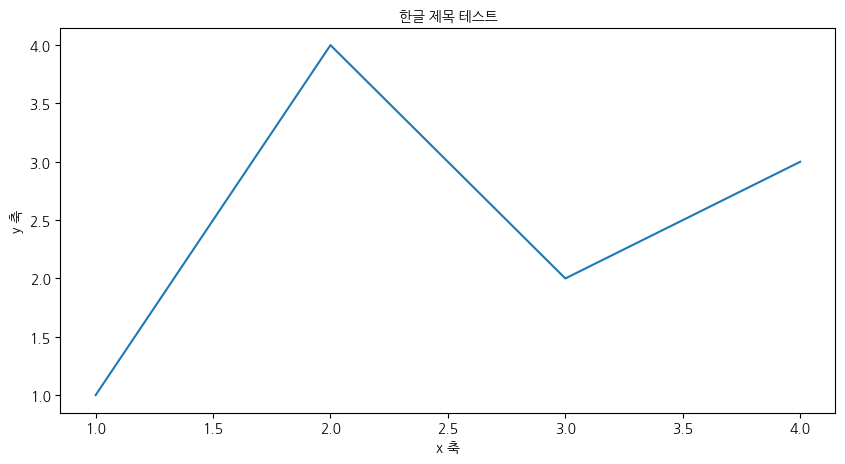

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# !pip install statsmodels==0.12.1

!pip install statsmodels
!pip install --upgrade pip setuptools wheel

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=10)

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
# 폰트 테스트
plt.figure(figsize=(10, 5))
plt.title('한글 제목 테스트', fontproperties=font_prop)
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.xlabel('x 축', fontproperties=font_prop)
plt.ylabel('y 축', fontproperties=font_prop)
plt.show()


In [ ]:
import tensorflow as tf
import keras
from numpy import array
import pandas as pd
from google.colab import drive
import numpy as np
import math
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import urllib.request
import json
import os


In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/nongsan_data/train.csv', encoding='utf-8')
print(df1.head())
print(df1.shape)


         date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
0  2016-01-01  금요일         0.0          0.0        0.0         0.0   
1  2016-01-02  토요일     80860.0        329.0    80272.0       360.0   
2  2016-01-03  일요일         0.0          0.0        0.0         0.0   
3  2016-01-04  월요일   1422742.5        478.0  1699653.7       382.0   
4  2016-01-05  화요일   1167241.0        442.0  1423482.3       422.0   

   양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
0         0.0          0.0          0.0           0.0  ...          0.0   
1    122787.5       1281.0          3.0       11000.0  ...       5125.0   
2         0.0          0.0          0.0           0.0  ...          0.0   
3   2315079.0       1235.0        699.0        4464.0  ...      38525.5   
4   2092960.1       1213.0       1112.6        4342.0  ...      32615.0   

   청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
0           0.0           0.0            0.0         

In [ ]:
# 날짜를 datetime 형식으로 변환
df1['date'] = pd.to_datetime(df1['date'])

# 요일을 원-핫 인코딩으로 변환
df1 = pd.concat([df1, pd.get_dummies(df1['요일'])], axis=1)

# 원본 '요일' 열 삭제
df1 = df1.drop('요일', axis=1)

print(df1.head())
print(df1.shape)

        date  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  \
0 2016-01-01         0.0          0.0        0.0         0.0         0.0   
1 2016-01-02     80860.0        329.0    80272.0       360.0    122787.5   
2 2016-01-03         0.0          0.0        0.0         0.0         0.0   
3 2016-01-04   1422742.5        478.0  1699653.7       382.0   2315079.0   
4 2016-01-05   1167241.0        442.0  1423482.3       422.0   2092960.1   

   양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  마늘_거래량(kg)  ...  캠벨얼리_가격(원/kg)  \
0          0.0          0.0           0.0         0.0  ...            0.0   
1       1281.0          3.0       11000.0     15019.0  ...         2014.0   
2          0.0          0.0           0.0         0.0  ...            0.0   
3       1235.0        699.0        4464.0    141638.0  ...         3885.0   
4       1213.0       1112.6        4342.0    126207.8  ...         2853.0   

   샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)    금요일    목요일    수요일    월요일    일요일    토요일  \
0 

In [ ]:
print(df1.describe())

                      date    배추_거래량(kg)  배추_가격(원/kg)     무_거래량(kg)  \
count                 1733  1.733000e+03  1733.000000  1.733000e+03   
mean   2018-05-16 00:00:00  1.113022e+06   597.120600  1.274344e+06   
min    2016-01-01 00:00:00  0.000000e+00     0.000000  0.000000e+00   
25%    2017-03-09 00:00:00  6.892023e+05   335.000000  1.008677e+06   
50%    2018-05-16 00:00:00  1.061471e+06   577.000000  1.374790e+06   
75%    2019-07-23 00:00:00  1.385737e+06   805.000000  1.661663e+06   
max    2020-09-28 00:00:00  5.210215e+06  5000.000000  3.859746e+06   
std                    NaN  8.376334e+05   410.151434  7.065624e+05   

        무_가격(원/kg)    양파_거래량(kg)  양파_가격(원/kg)    건고추_거래량(kg)   건고추_가격(원/kg)  \
count  1733.000000  1.733000e+03  1733.000000    1733.000000    1733.000000   
mean    490.738604  1.656628e+06   652.812464    3578.541546    9537.642239   
min       0.000000  0.000000e+00     0.000000       0.000000       0.000000   
25%     324.000000  1.334250e+06   467.00000

In [ ]:
# 결측치 처리
df1 = df1.replace(0, np.nan)
print(df1.isnull().sum())

# 결측치를 전날과 다음날의 평균으로 채우기
df1 = df1.interpolate().fillna(method='bfill').fillna(method='ffill')

date                0
배추_거래량(kg)        253
배추_가격(원/kg)       253
무_거래량(kg)         254
무_가격(원/kg)        254
양파_거래량(kg)        255
양파_가격(원/kg)       255
건고추_거래량(kg)       274
건고추_가격(원/kg)      274
마늘_거래량(kg)        265
마늘_가격(원/kg)       265
대파_거래량(kg)        254
대파_가격(원/kg)       254
얼갈이배추_거래량(kg)     261
얼갈이배추_가격(원/kg)    261
양배추_거래량(kg)       258
양배추_가격(원/kg)      258
깻잎_거래량(kg)        254
깻잎_가격(원/kg)       254
시금치_거래량(kg)       257
시금치_가격(원/kg)      257
미나리_거래량(kg)       260
미나리_가격(원/kg)      260
당근_거래량(kg)        262
당근_가격(원/kg)       262
파프리카_거래량(kg)      265
파프리카_가격(원/kg)     265
새송이_거래량(kg)       258
새송이_가격(원/kg)      258
팽이버섯_거래량(kg)      265
팽이버섯_가격(원/kg)     265
토마토_거래량(kg)       258
토마토_가격(원/kg)      258
청상추_거래량(kg)       259
청상추_가격(원/kg)      259
백다다기_거래량(kg)      263
백다다기_가격(원/kg)     263
애호박_거래량(kg)       258
애호박_가격(원/kg)      258
캠벨얼리_거래량(kg)      305
캠벨얼리_가격(원/kg)     305
샤인마스캇_거래량(kg)     811
샤인마스캇_가격(원/kg)    811
금요일                 0
목요일                 0
수요일       

<ipython-input-60-409d13fba1fc>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df1.interpolate().fillna(method='bfill').fillna(method='ffill')


             배추_거래량(kg)  배추_가격(원/kg)
배추_거래량(kg)     1.000000    -0.133432
배추_가격(원/kg)   -0.133432     1.000000


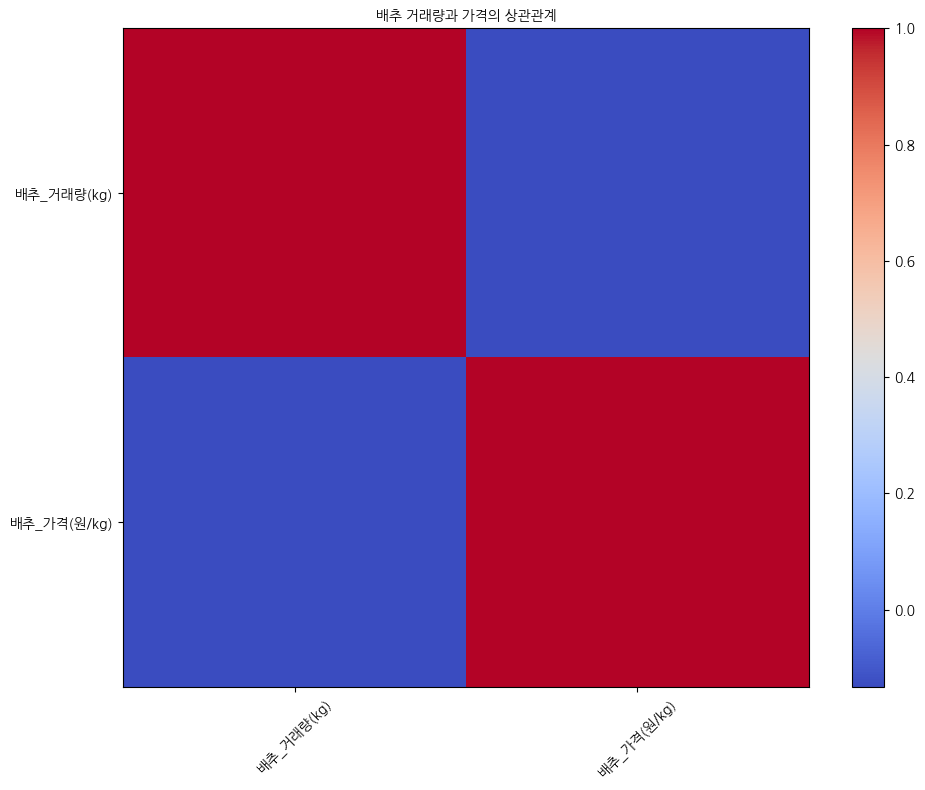

In [ ]:
# 상관관계 그래프
corr = df1[['배추_거래량(kg)', '배추_가격(원/kg)']].corr()
print(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('배추 거래량과 가격의 상관관계', fontproperties=font_prop)
plt.tight_layout()
plt.show()

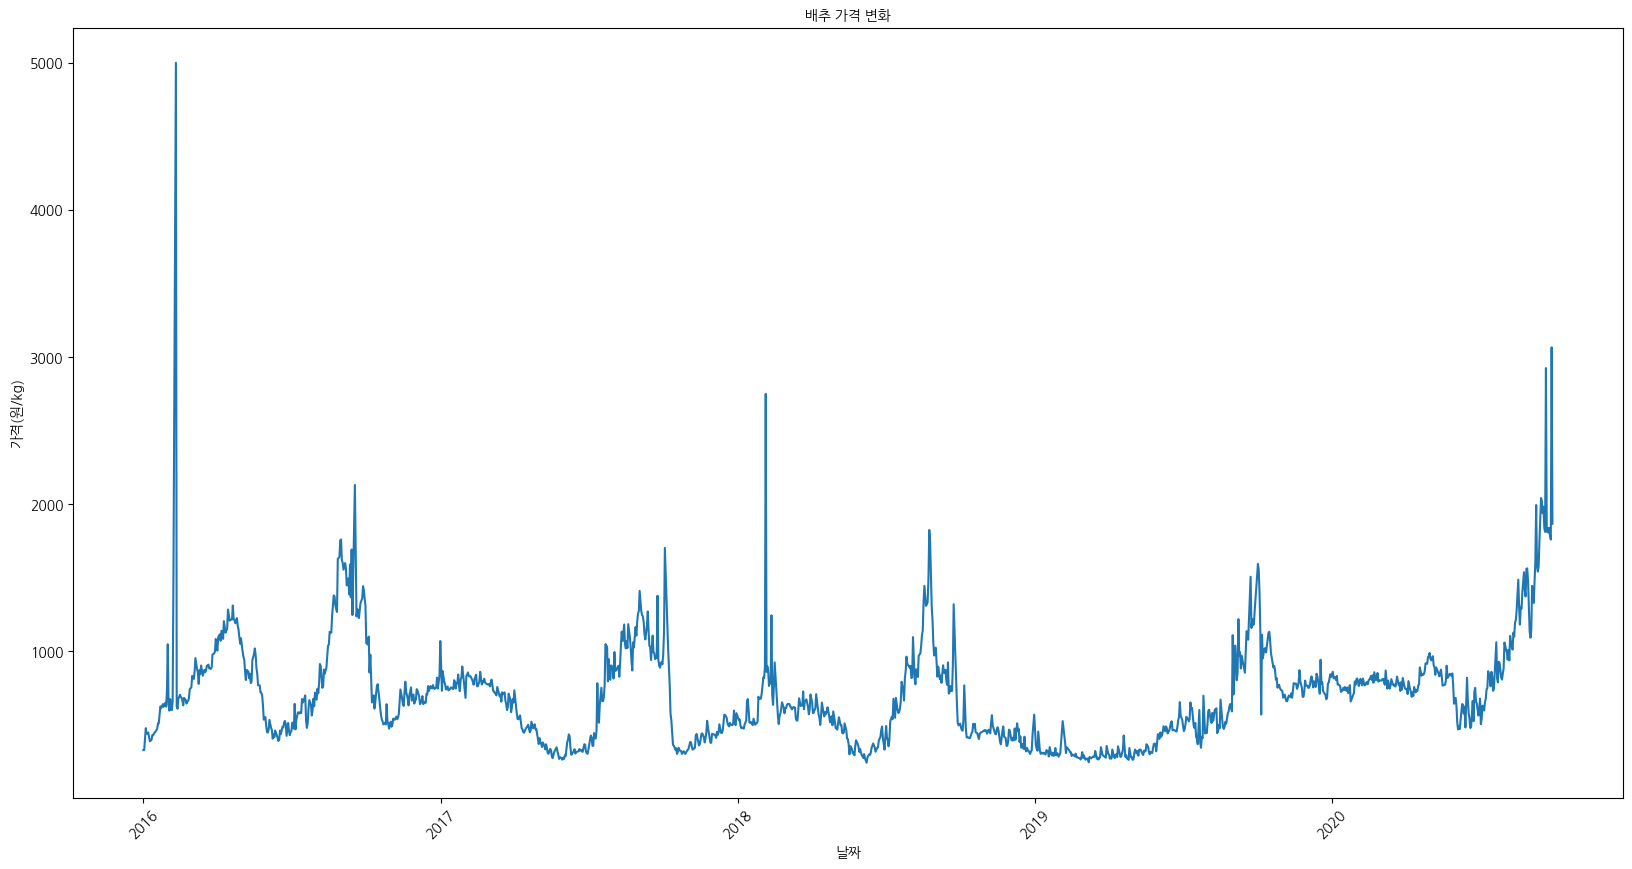

In [ ]:
# 배추 가격 시계열 그래프
plt.figure(figsize=(20,10))
plt.plot(df1['date'], df1['배추_가격(원/kg)'])
plt.title('배추 가격 변화', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('가격(원/kg)', fontproperties=font_prop)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# LSTM 모델 구축을 위한 데이터 준비
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# 배추 가격 데이터 추출
data = df1['배추_가격(원/kg)'].values
data = data.reshape(-1,1)

In [ ]:
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

In [ ]:
# 학습 데이터와 테스트 데이터 분리
train_size = int(len(data) * 0.80)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

In [ ]:

# 시계열 데이터셋 생성
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
# LSTM 입력을 위한 데이터 reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 9.7941e-04 - val_loss: 0.0016
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - loss: 7.7128e-04 - val_loss: 0.0010
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - loss: 9.3483e-04 - val_loss: 0.0010
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 7.6191e-04 - val_loss: 0.0010
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - loss: 8.7367e-04 - val_loss: 0.0012
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 7.5281e-04 - val_loss: 0.0011
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 6.3022e-04 - val_loss: 0.0011
Epoch 12/100

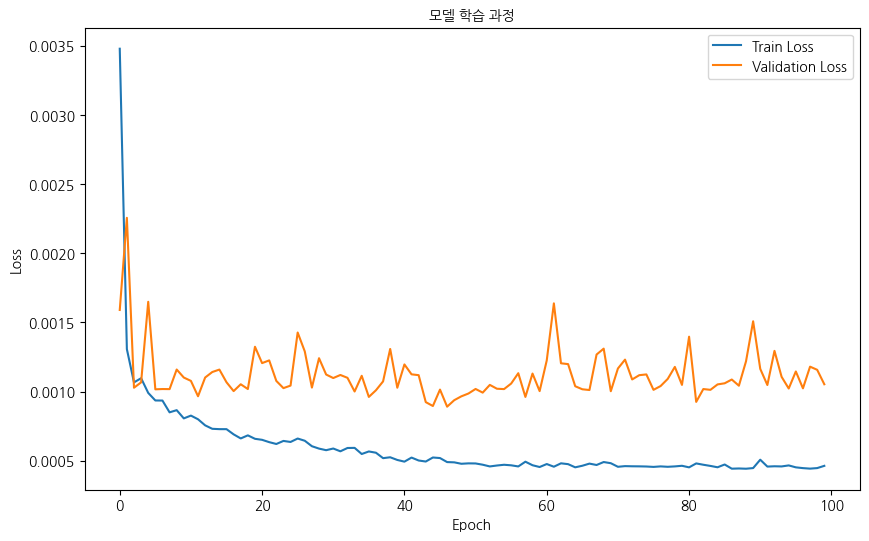

In [ ]:
# 학습 과정 시각화
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('모델 학습 과정', fontproperties=font_prop)
plt.xlabel('Epoch', fontproperties=font_prop)
plt.ylabel('Loss', fontproperties=font_prop)
plt.legend()
plt.show()

In [ ]:
# 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
# 예측 결과 역정규화
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

In [ ]:
# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 99.15120442654235
Test RMSE: 154.3607178855908


In [ ]:
print(f"df1['date'] shape: {df1['date'].shape}")
print(f"y_train shape: {y_train.shape}")
print(f"train_predict shape: {train_predict.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"test_predict shape: {test_predict.shape}")
print(f"time_step: {time_step}")
print(f"train_size: {train_size}")

df1['date'] shape: (1733,)
y_train shape: (1, 1325)
train_predict shape: (1325, 1)
y_test shape: (1, 286)
test_predict shape: (286, 1)
time_step: 60
train_size: 1386


In [ ]:
# 날짜와실제 가격 데이터 중 데이터 빈 부분을 찾기 위한 shape 비교.
print(f"df1['date'] shape: {df1['date'].shape}")
print(f"y_train shape: {y_train.shape}")
print(f"train_predict shape: {train_predict.shape}")
print(f"time_step: {time_step}")
print(f"train_size: {train_size}")
print(f"len(train_dates): {len(df1['date'][time_step:train_size])}")
print(f"len(y_train[0]): {len(y_train[0])}")


df1['date'] shape: (1733,)
y_train shape: (1, 1325)
train_predict shape: (1325, 1)
time_step: 60
train_size: 1386
len(train_dates): 1326
len(y_train[0]): 1325


In [ ]:
# 날짜와 실제 가격 데이터 비교
dates = df1['date'][time_step:train_size].reset_index(drop=True)
prices = pd.Series(y_train[0])

print("날짜 수:", len(dates))
print("가격 데이터 수:", len(prices))

# 불일치 지점 찾기
for i in range(min(len(dates), len(prices))):
    if i+1 < len(dates) and i+1 < len(prices):
        days_diff = (dates[i+1] - dates[i]).days
        if days_diff != 1:
            print(f"불일치 발견: {dates[i]}와 {dates[i+1]} 사이에 {days_diff-1}일 차이")

    if i == min(len(dates), len(prices)) - 1:
        print(f"데이터 끝: 날짜 - {dates[i]}, 가격 - {prices[i]}")

# 마지막 몇 개의 데이터 출력
print("\n마지막 5개의 날짜:")
print(dates[-5:])
print("\n마지막 5개의 가격 데이터:")
print(prices[-5:])

# 날짜와 가격 데이터의 길이 차이 확인
if len(dates) > len(prices):
    print(f"\n날짜 데이터가 {len(dates) - len(prices)}개 더 많습니다.")
    print("추가된 날짜:", dates[len(prices):])
elif len(prices) > len(dates):
    print(f"\n가격 데이터가 {len(prices) - len(dates)}개 더 많습니다.")
    print("추가된 가격:", prices[len(dates):])

날짜 수: 1326
가격 데이터 수: 1325
데이터 끝: 날짜 - 2019-10-16 00:00:00, 가격 - 1133.0

마지막 5개의 날짜:
1321   2019-10-13
1322   2019-10-14
1323   2019-10-15
1324   2019-10-16
1325   2019-10-17
Name: date, dtype: datetime64[ns]

마지막 5개의 가격 데이터:
1320     993.0
1321    1036.5
1322    1080.0
1323    1126.0
1324    1133.0
dtype: float64

날짜 데이터가 1개 더 많습니다.
추가된 날짜: 1325   2019-10-17
Name: date, dtype: datetime64[ns]


ValueError: x and y must have same first dimension, but have shapes (348,) and (286,)

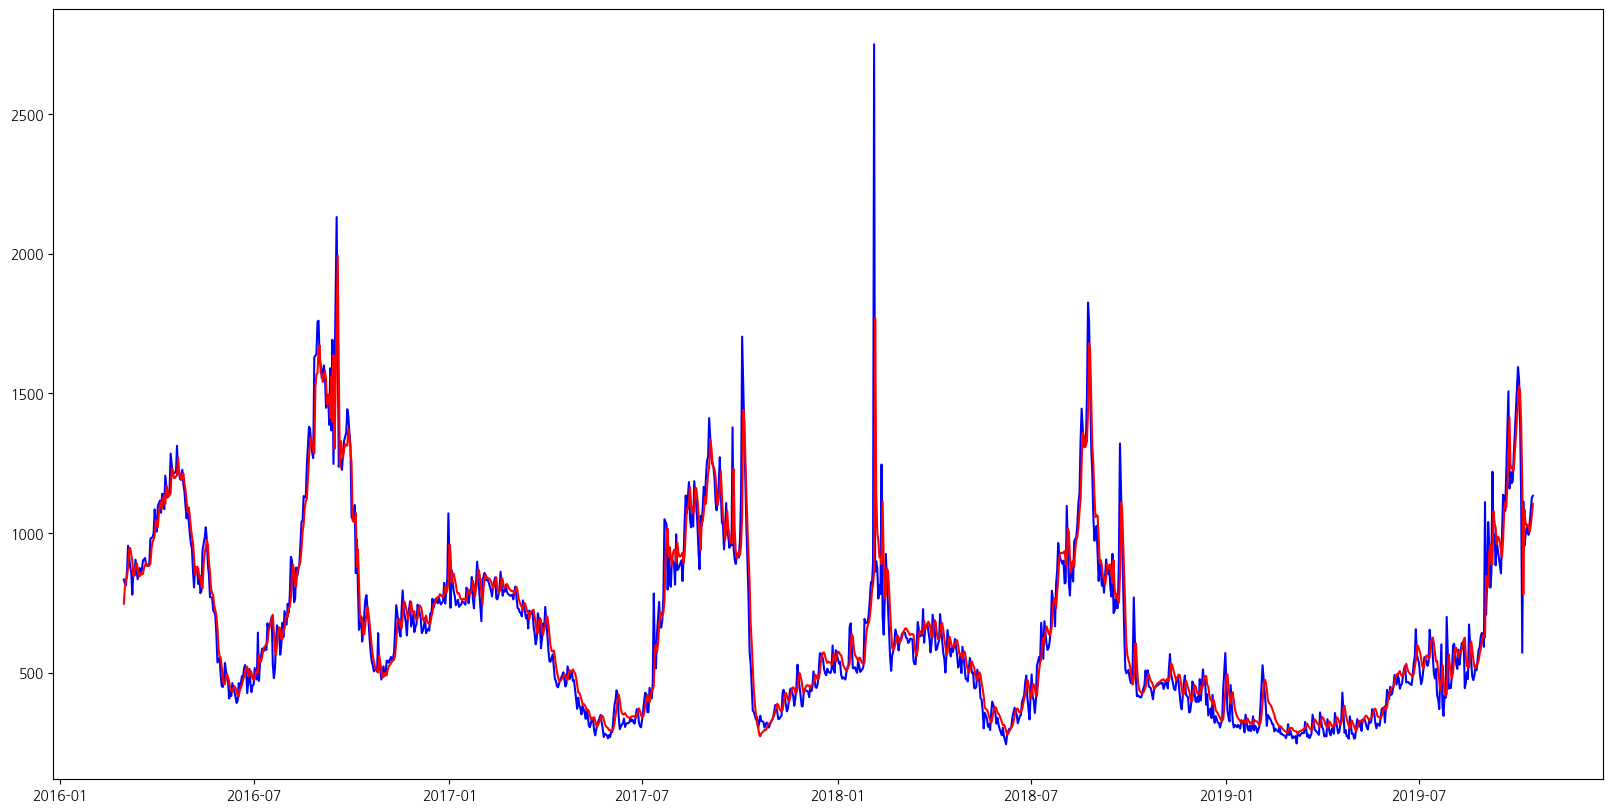

In [ ]:
import matplotlib.pyplot as plt

# 날짜 데이터 준비
all_dates = df1['date'].values

# 학습 데이터와 테스트 데이터 분리 지점 계산
split_point = len(y_train[0]) + time_step

# 예측 결과 시각화
plt.figure(figsize=(20,10))

# 학습 데이터 구간
train_dates = all_dates[time_step:split_point]
plt.plot(train_dates, y_train[0], label='실제 가격 (학습)', color='blue')
plt.plot(train_dates, train_predict[:,0], label='학습 데이터 예측', color='red')

# 테스트 데이터 구간
test_dates = all_dates[split_point:]
plt.plot(test_dates, y_test[0], label='실제 가격 (테스트)', color='green')
plt.plot(test_dates[:len(test_predict)], test_predict[:,0], label='테스트 데이터 예측', color='orange')

plt.title('배추 가격 예측 결과', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('가격(원/kg)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 테스트 데이터에 대한 MAE 출력
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(f'테스트 데이터 MAE: {mae:.2f}')

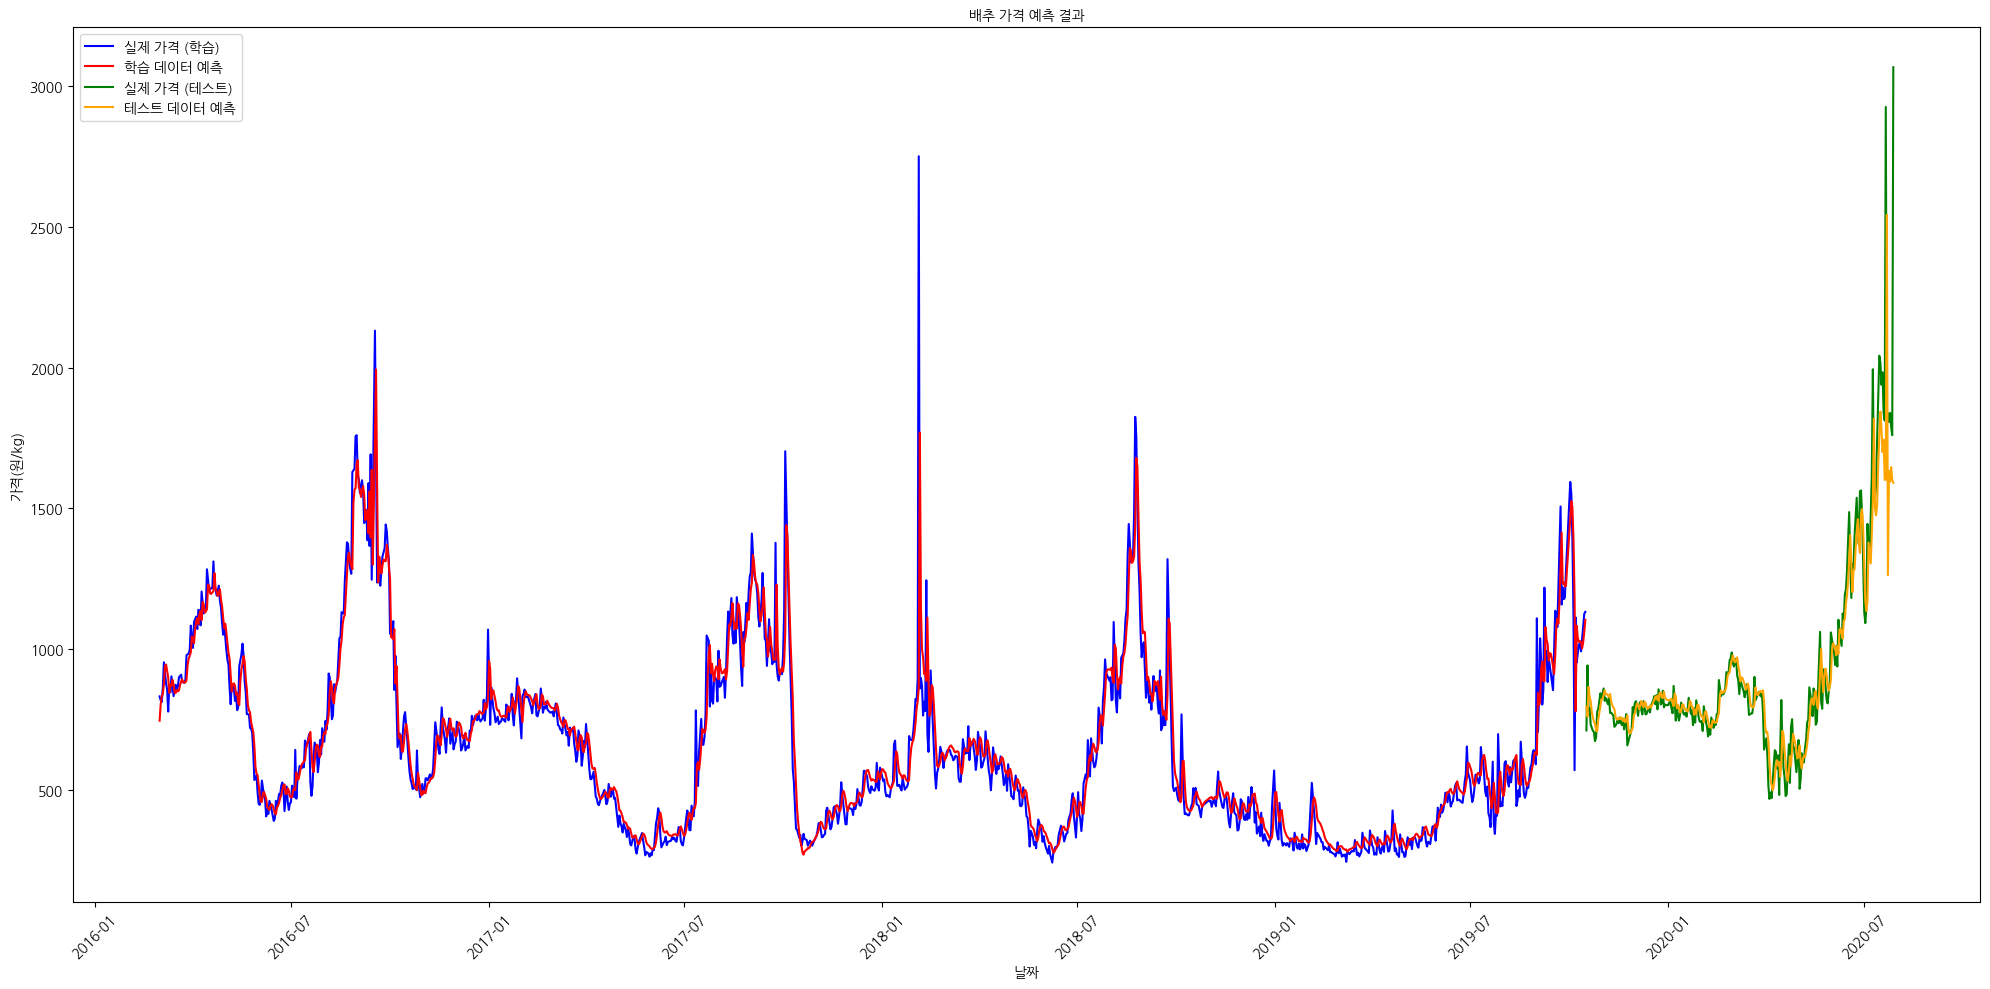

테스트 데이터 MAE: 71.48
학습 데이터 길이: 1325
테스트 데이터 길이: 286


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 데이터 준비
all_dates = pd.to_datetime(df1['date'].values)

# 학습 데이터와 테스트 데이터 분리 지점 계산
split_point = len(y_train[0]) + time_step

# 데이터프레임 생성
train_df = pd.DataFrame({
    'date': all_dates[time_step:split_point],
    'actual': y_train[0],
    'predicted': train_predict[:,0]
})

test_df = pd.DataFrame({
    'date': all_dates[split_point:split_point+len(y_test[0])],
    'actual': y_test[0],
    'predicted': test_predict[:,0]
})

# NaN 값 제거 (한쪽에만 있는 데이터 제거)
train_df = train_df.dropna()
test_df = test_df.dropna()

# 예측 결과 시각화
plt.figure(figsize=(20,10))

# 학습 데이터 구간
plt.plot(train_df['date'], train_df['actual'], label='실제 가격 (학습)', color='blue')
plt.plot(train_df['date'], train_df['predicted'], label='학습 데이터 예측', color='red')

# 테스트 데이터 구간
plt.plot(test_df['date'], test_df['actual'], label='실제 가격 (테스트)', color='green')
plt.plot(test_df['date'], test_df['predicted'], label='테스트 데이터 예측', color='orange')

plt.title('배추 가격 예측 결과', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('가격(원/kg)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 테스트 데이터에 대한 MAE 출력
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df['actual'], test_df['predicted'])
print(f'테스트 데이터 MAE: {mae:.2f}')

# 데이터 길이 확인을 위한 출력
print(f"학습 데이터 길이: {len(train_df)}")
print(f"테스트 데이터 길이: {len(test_df)}")

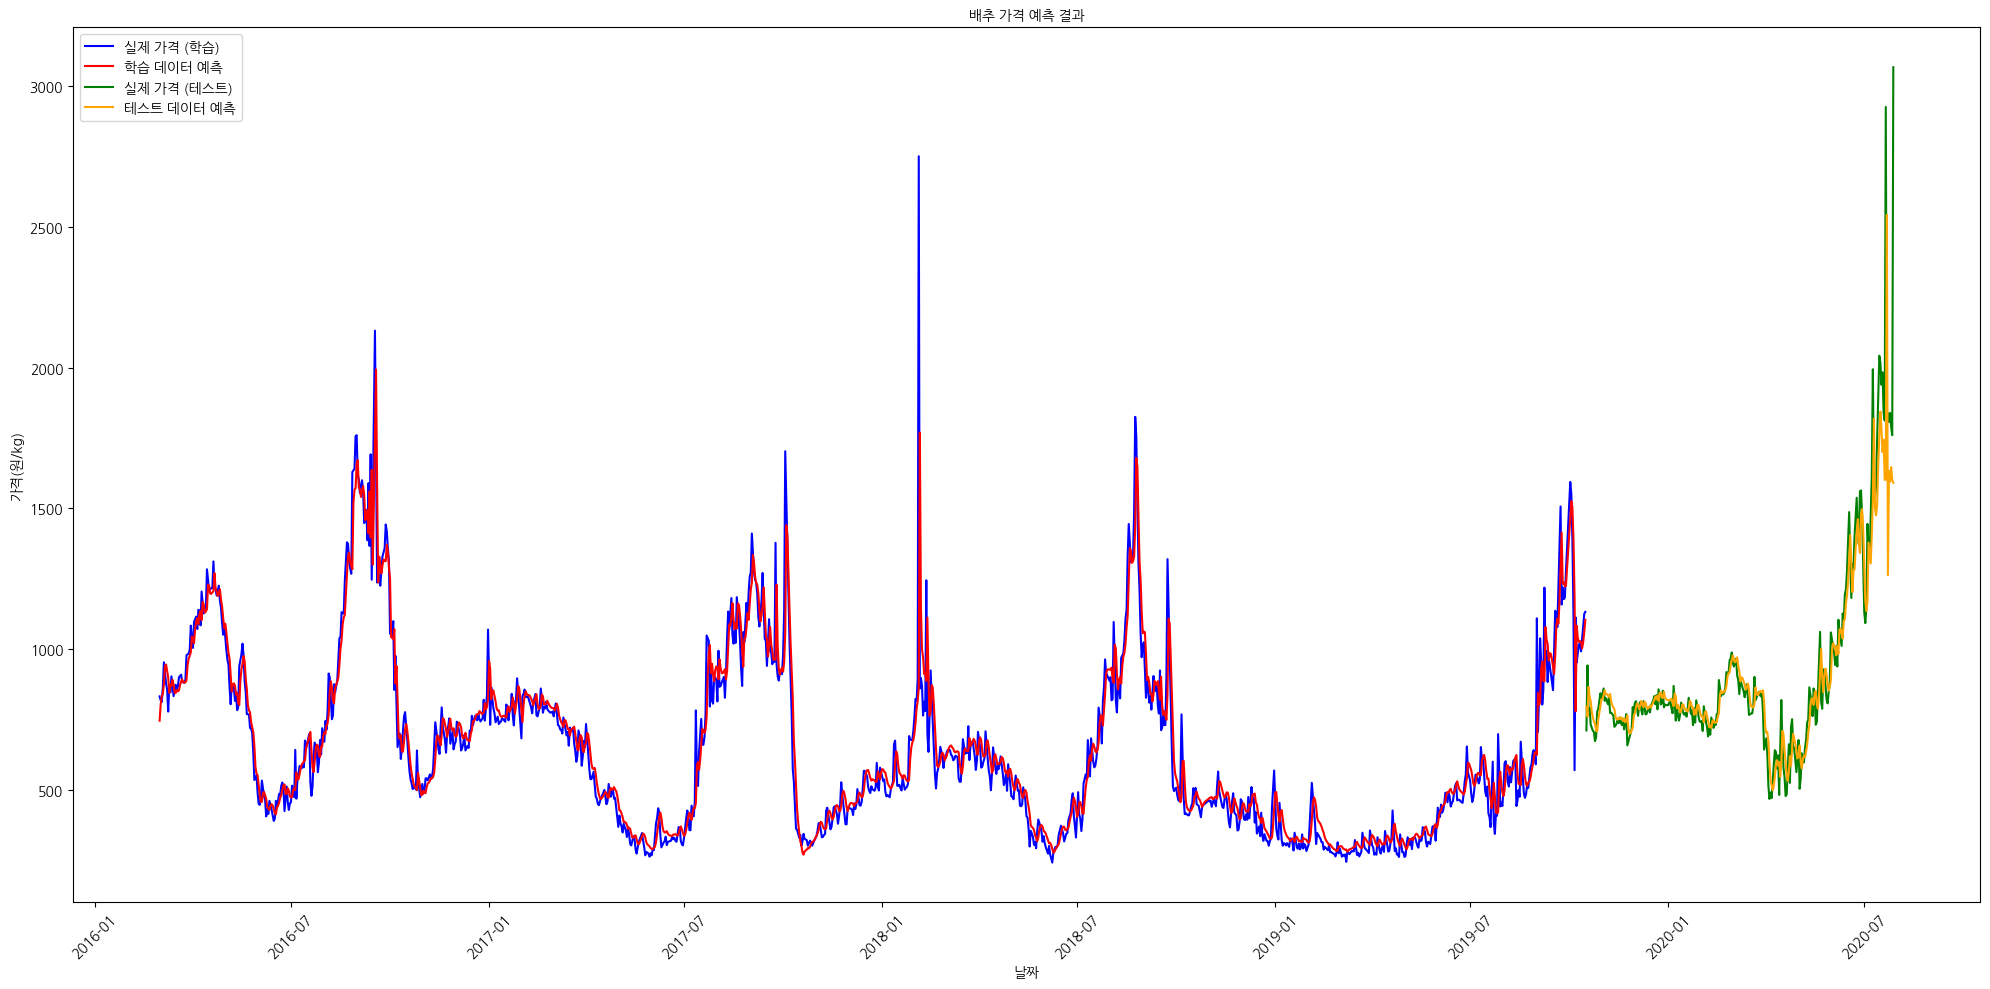

테스트 데이터 MAE: 71.48
학습 데이터 길이: 1325
테스트 데이터 길이: 286

2020년 7월 이후의 예측값:
      date  actual   predicted
2020-04-01   684.0  703.786072
2020-04-02   629.0  706.347046
2020-04-03   515.0  675.443420
2020-04-04   469.0  597.738098
2020-04-05   492.0  536.329102
2020-04-06   472.0  518.543701
2020-04-07   531.0  499.826782
2020-04-08   590.0  514.162598
2020-04-09   642.0  548.421021
2020-04-10   636.0  589.157471
2020-04-11   577.0  606.780212
2020-04-12   624.0  587.498657
2020-04-13   483.0  600.344177
2020-04-14   651.5  547.909424
2020-04-15   820.0  596.876465
2020-04-16   668.0  710.291504
2020-04-17   580.0  698.259766
2020-04-18   546.0  640.971741
2020-04-19   479.0  599.784973
2020-04-20   485.0  553.203613
2020-04-21   574.0  533.356750
2020-04-22   663.0  564.203979
2020-04-23   526.0  620.844727
2020-04-24   723.0  585.320679
2020-04-25   752.0  646.710449
2020-04-26   659.0  700.638611
2020-04-27   646.0  682.493835
2020-04-28   605.0  664.362549
2020-04-29   564.0  640.863831


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 데이터 준비
all_dates = pd.to_datetime(df1['date'].values)

# 학습 데이터와 테스트 데이터 분리 지점 계산
split_point = len(y_train[0]) + time_step

# 데이터프레임 생성
train_df = pd.DataFrame({
    'date': all_dates[time_step:split_point],
    'actual': y_train[0],
    'predicted': train_predict[:,0]
})

test_df = pd.DataFrame({
    'date': all_dates[split_point:split_point+len(y_test[0])],
    'actual': y_test[0],
    'predicted': test_predict[:,0]
})

# NaN 값 제거 (한쪽에만 있는 데이터 제거)
train_df = train_df.dropna()
test_df = test_df.dropna()

# 예측 결과 시각화
plt.figure(figsize=(20,10))

# 학습 데이터 구간
plt.plot(train_df['date'], train_df['actual'], label='실제 가격 (학습)', color='blue')
plt.plot(train_df['date'], train_df['predicted'], label='학습 데이터 예측', color='red')

# 테스트 데이터 구간
plt.plot(test_df['date'], test_df['actual'], label='실제 가격 (테스트)', color='green')
plt.plot(test_df['date'], test_df['predicted'], label='테스트 데이터 예측', color='orange')

plt.title('배추 가격 예측 결과', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('가격(원/kg)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 테스트 데이터에 대한 MAE 출력
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df['actual'], test_df['predicted'])
print(f'테스트 데이터 MAE: {mae:.2f}')

# 데이터 길이 확인을 위한 출력
print(f"학습 데이터 길이: {len(train_df)}")
print(f"테스트 데이터 길이: {len(test_df)}")

# 2020년 7월 이후의 예측값 출력
print("\n2020년 7월 이후의 예측값:")
future_predictions = test_df[test_df['date'] >= '2020-04-01']
print(future_predictions[['date', 'actual', 'predicted']].to_string(index=False))

# 마지막 10개의 예측값 출력
print("\n마지막 10개의 예측값:")
print(test_df[['date', 'actual', 'predicted']].tail(10).to_string(index=False))
